# 3. Making a Model Selection Workflow


First, we import the required modules.


In [1]:
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd


import BMSS.models.model_handler as mh
import BMSS.models.setup_cf      as sc
import BMSS.icanalysis           as ac
import BMSS.curvefitting         as cf
import BMSS.traceanalysis        as ta

Connected to MBase_models, UBase_models
Connected to MBase_settings, UBase_settings


Next we import the models. In this case, we have three models that we want to fit:

A model for protein expression that lumps translation and trscription together i.e. no mRNA
```
[system_type]
system_type = LogicGate, Not, Single

[states]
states = p1, p2

[parameters]
parameters = kp1, synp1, synp2, rep, degp

[inputs]
inputs = u1

[equations]
equations = 
	dp1 = synp1 *u1                    -degp*p1
	dp2 = synp2 *(kp1+rep*p1)/(kp1+p1) -degp*p2



[LogicGate, Not, Single]

init = 
	p1 = [0],
	p2 = [0]

guess = 
	kp1   = [5e-5],
	synp1 = [1e-5],
	synp2 = [1e-5],
	rep   = [0.8],
	degp  = [0.012],
	u1    = [0]

priors = 
	degp = [0.012, 0.04]

parameter_bounds = 
	kp1    = [1e-7, 1e-4],
	synp1  = [1e-7, 1e-4],
	synp2  = [1e-7, 1e-4],
	rep    = [0, 1],
	degp   = [0.001, 0.05],
	u1     = [0, 1] 

input_conditions = 
	u1 = 3
	
fixed_parameters = 
	[degp, u1]

measured_states = 
	[p1, p2]

decomposition = 
	[[p1, p2]]
	
units = 
	kp1   = M,
	synp1 = M/min,
	synp2 = M/min,
	rep   = NONE,
	degp  = 1/min,
	u1    = NONE
```

A model that includes mRNA transcription.
```
[system_type]
system_type = LogicGate, Not, Double

[states]
states = m1, m2, p1, p2

[parameters]
parameters = synm1, synm2, degm, kp1, rep, synp1, synp2, degp

[inputs]
inputs = u1

[equations]
equations = 
	dm1 = synm1*u1                    -degm*m1
	dm2 = synm2*(kp1+rep*p1)/(kp1+p1) -degm*m2
	dp1 = synp1 *m1                   -degp*p1
	dp2 = synp2 *m2                   -degp*p2

[LogicGate, Not, Double]

init = 
	m1 = [0],
	m2 = [0],
	p1 = [0],
	p2 = [0]

guess = 
	synm1  = [1e-5],
	synm2  = [1e-5],
	degm   = [0.15],
	kp1    = [5e-5],
	rep    = [0.8],
	synp1  = [1e-2],
	synp2  = [1e-2],
	degp   = [0.012],
	u1     = [0]

priors = 
	degm = [0.15, 0.05],
	degp = [0.012, 0.04]
	
parameter_bounds = 
	synm1  = [1e-7, 1e-4],
	synm2  = [1e-7, 1e-4],
	degm   = [0.01, 0.3],
	kp1    = [1e-7, 1e-4],
	rep    = [0, 1],
	synp1  = [1e-3, 1e-1],
	synp2  = [1e-3, 1e-1],
	degp   = [0.001, 0.05],
	u1     = [0, 1]

input_conditions = 
	u1 = 3
	
fixed_parameters = 
	[degm, degp, u1]

measured_states = 
	[p1, p2]

decomposition = 
	[[m1, p1], [m2, p2]]
	
units = 
	synm1  = M/min,
	synm2  = M/min,
	degm   = 1/min,
	kp1    = M,
	rep    = NONE,
	synp1  = 1/min,
	synp2  = 1/min,
	degp   = 1/min,
	u1     = NONE
    
```

A model that includes mRNA transcription and protein maturation.

```
[system_type]
system_type = LogicGate, Not, Double, MaturationSecond

[states]
states = m1, m2, p1, p2n, p2

[parameters]
parameters = synm1, synm2, degm, kp1, rep, synp1, synp2, matp2, degp

[inputs]
inputs = u1

[equations]
equations = 
	dm1  = synm1*u1                    -degm *m1
	dm2  = synm2*(kp1+rep*p1)/(kp1+p1) -degm *m2
	dp1  = synp1 *m1                   -degp *p1
	dp2n = synp2 *m2                   -matp2*p2n
	dp2  = matp2*p2n                   -degp *p2 

[LogicGate, Not, Double, MaturationSecond]

init = 
	m1  = [0],
	m2  = [0],
	p1  = [0],
	p2n = [0],
	p2  = [0]

guess = 
	synm1 = [1e-5],
	synm2 = [1e-5],
	degm  = [0.15],
	kp1   = [5e-5],
	rep   = [0.8],
	synp1 = [1e-2],
	synp2 = [1e-2],
	matp2 = [0.03],
	degp  = [0.012],
	u1    = [0]

priors = 
	degm = [0.15, 0.05],
	degp = [0.012, 0.04]

parameter_bounds = 
	synm1  = [1e-7, 1e-4],
	synm2  = [1e-7, 1e-4],
	degm   = [0.01, 0.3],
	kp1    = [1e-7, 1e-4],
	rep    = [0, 1],
	synp1  = [1e-3, 1e-1],
	synp2  = [1e-3, 1e-1],
	matp2  = [1e-3, 1e-1],
	degp   = [0.001, 0.05],
	u1     = [0, 1]

input_conditions = 
	u1 = 3

fixed_parameters = 
	[degm, matp2, degp, u1]

measured_states = 
	[p1, p2]

decomposition = 
	[[m1, p1], [m2, p2n, p2]]
	
units = 
	synm1 = M/min,
	synm2 = M/min,
	degm  = 1/min,
	kp1   = M,
	rep   = NONE,
	synp1 = 1/min,
	synp2 = 1/min,
	matp2 = 1/min,
	degp  = 1/min,
	u1    = NONE


```


In [2]:
#Set up core models and sampler arguments
#Details in Tutorial 5 Parts 1 and 2
model_files = ['LogicGate_Not_Single.ini',
               'LogicGate_Not_Double.ini',
               'LogicGate_Not_Double_MaturationSecond.ini',
               ]

user_core_models = [mh.from_config(filename) for filename in model_files]
user_core_models = {core_model['system_type']: core_model for core_model in user_core_models}

sampler_args, config_data = sc.get_sampler_args(model_files, user_core_models=user_core_models)
    

To characterize a NOT gate, we need to simulate the on and off states (i.e. two scenarios). Since we the parameter u0 will change depending on the scenario, we define a modify_params function that changes u0 based on the scenario. In addition, the initial values of the proteins in the models that include mRNA depend on the intial mRNA concentrations (assuming steady-state). We therefore also define a modify_init function that adjusts the initial values of the proteins based on the calculated steady-state values from the parameters.

In [3]:
def modify_params(init_values, params, model_num, scenario_num, segment):
    #Always use a copy and not the original
    new_params = params.copy()
    
    #Change value of inducer based on scenario_num
    if scenario_num == 1:
        new_params[-1] = 0
    else:
        new_params[-1] = 1
        
    return new_params

def modify_init(init_values, params, model_num, scenario_num, segment):
    #Always use a copy and not the original
    new_init = init_values.copy()
    
    if model_num == 1:
        pass
    
    elif model_num == 2:
       synm1, synm2, degm, kp1, rep, synp1, synp2, degp, u1 = params
       
       new_init[1] = synm2/degm
       
    else:
        synm1, synm2, degm, kp1, rep, synp1, synp2, matp2, degp, u1 = params
        m1, m2, p1, p2n, p2 = init_values
        
        new_init[1] = synm2/degm
        new_init[3] = synp2*m2/matp2
        
    return new_init


Next we read the data. BMSS2 does not have a standardized file format for experimental data format. You have to write your own function to generate the appropriate data structures from your files.

In [4]:
#This is just an example. Write your own based on your data file formats!
from   read_data                 import read_data

data_files = {'Fluor/OD' : 'data/not_gate.csv',
              }
data_mu, data_sd, init, state_sd, tspan = read_data(data_files, n_models=len(config_data))

    

Firstly, you will need data_mu, a dictionary containing the experimental means nested according to model_num->state->scenario_num.

Note: Scenario numbers in BMSS are always positive integers.

In [5]:
data_mu[1]['Fluor/OD'][1]

array([0.00016846, 0.00016709, 0.00016505, 0.00016492, 0.00016622,
       0.00016536, 0.0001663 , 0.00016791, 0.00016922, 0.00017165,
       0.0001749 , 0.0001772 , 0.00018073, 0.00018408, 0.00018661,
       0.00019042, 0.00019291, 0.00019494, 0.00019687, 0.0001982 ,
       0.00019873, 0.00020043, 0.00020122, 0.00020297, 0.00020254,
       0.00020265, 0.00020256, 0.0002019 , 0.00020067, 0.00019887,
       0.00019843, 0.0001972 , 0.00019612, 0.00019529, 0.00019439,
       0.00019349, 0.00019359, 0.00019448, 0.00019419, 0.00019417,
       0.00019455, 0.00019394, 0.00019388, 0.00019477, 0.00019417,
       0.00019461, 0.00019436, 0.00019537, 0.0001953 , 0.00019483,
       0.00019447, 0.00019562, 0.00019583, 0.00019644, 0.00019749,
       0.00019768, 0.00019793, 0.00019992, 0.00020136, 0.00020248,
       0.00020349, 0.00020434, 0.00020496, 0.00020666, 0.00020748,
       0.00020831, 0.00020953, 0.00021106, 0.00021324, 0.00021478,
       0.00021544, 0.00021685, 0.0002173 ])

For curve-fitting, 0 and -1 are are reserved for the time points and optional metadata respectively.

In [6]:
data_mu[1]['Fluor/OD'][0]

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640,
       650, 660, 670, 680, 690, 700, 710, 720], dtype=int64)

In [7]:
data_mu[1]['Fluor/OD'][-1]

['Time(min)', 'Input0', 'Input1']

Next we have data_sd, which represents the standard deviation for the data points. This is required for plotting. Like data_mu, it is a nested dictionary too.

In [8]:
data_sd[1]['Fluor/OD'][1]

array([2.42656e-06, 9.37248e-07, 9.19792e-07, 2.76109e-06, 3.24705e-06,
       4.98056e-07, 1.28286e-06, 3.47485e-07, 1.39350e-06, 1.39600e-06,
       2.72240e-06, 1.70335e-06, 2.02147e-06, 2.49997e-06, 1.24595e-06,
       2.04816e-06, 1.06684e-06, 2.64642e-06, 1.85434e-06, 2.66398e-06,
       3.28476e-06, 3.31294e-06, 3.41525e-06, 3.99973e-06, 4.00629e-06,
       4.72510e-06, 4.48240e-06, 4.34397e-06, 3.83979e-06, 3.96017e-06,
       3.44663e-06, 3.69322e-06, 3.21070e-06, 3.94781e-06, 4.10837e-06,
       3.72995e-06, 3.81588e-06, 3.91394e-06, 3.95898e-06, 3.69636e-06,
       2.62381e-06, 2.85074e-06, 3.24365e-06, 2.78016e-06, 3.04043e-06,
       3.42828e-06, 3.40368e-06, 3.31324e-06, 3.52927e-06, 3.18079e-06,
       3.70341e-06, 3.77066e-06, 3.90530e-06, 3.98203e-06, 4.34979e-06,
       2.97448e-06, 3.39774e-06, 3.83076e-06, 4.06592e-06, 3.39255e-06,
       3.40962e-06, 2.72869e-06, 3.80955e-06, 2.94705e-06, 3.21857e-06,
       3.25478e-06, 3.17322e-06, 2.91145e-06, 3.01634e-06, 3.460

In [9]:
data_sd[1]['Fluor/OD'][0]

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640,
       650, 660, 670, 680, 690, 700, 710, 720], dtype=int64)

For curve-fitting, a standard deviation is required to normalize the SSE for each state.

In [10]:
state_sd

{'Fluor/OD': 2.1642987945205473e-06}

In the event the tspan and initial values in the settings file are not the same as the experimental data, you will have to reassign them in your script.

Now we update the sampler arguments with the information from the experimental data.

In [11]:
#Update sampler_args with the information from the data
sampler_args['models'][1]['states'] = ['p1', 'Fluor/OD']
sampler_args['models'][2]['states'] = ['m1', 'm2', 'p1', 'Fluor/OD']
sampler_args['models'][3]['states'] = ['m1', 'm2', 'p1', 'p2n', 'Fluor/OD']
sampler_args['data']                = data_mu

for model_num in sampler_args['models']:
    sampler_args['models'][model_num]['tspan'] = [tspan]
    sampler_args['models'][model_num]['sd']    = state_sd

    model_init = {scenario: [init[model_num][scenario].get(state, 0) for state in sampler_args['models'][model_num]['states']] for scenario in init[model_num]}
    sampler_args['models'][model_num]['init']                      = model_init
    sampler_args['models'][model_num]['int_args']['modify_params'] = modify_params
    sampler_args['models'][model_num]['int_args']['modify_init']   = modify_init

Time to run the sampler! In this case, we'll just run it once but often, we should run it more times to ensure convergence.

In [12]:
#Run sampler
traces    = {}#To collect the trace
result    = cf.simulated_annealing(**sampler_args)
accepted  = result['a']
traces[1] = accepted


100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:32<00:00, 91.51it/s]


After fitting, we plot the results to check the fit.

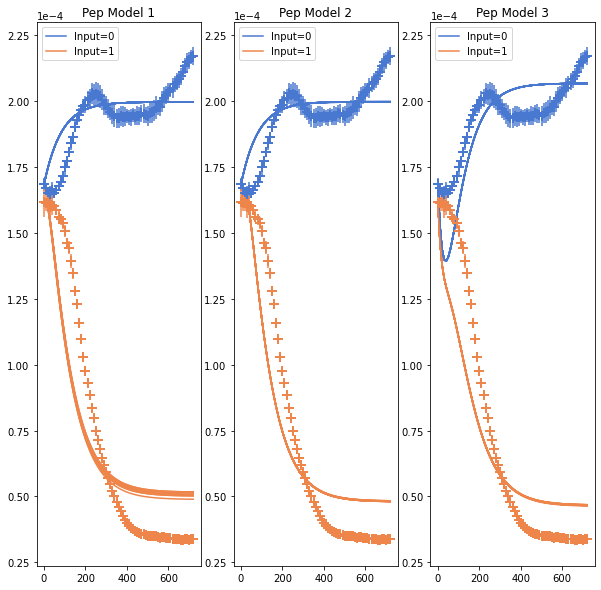

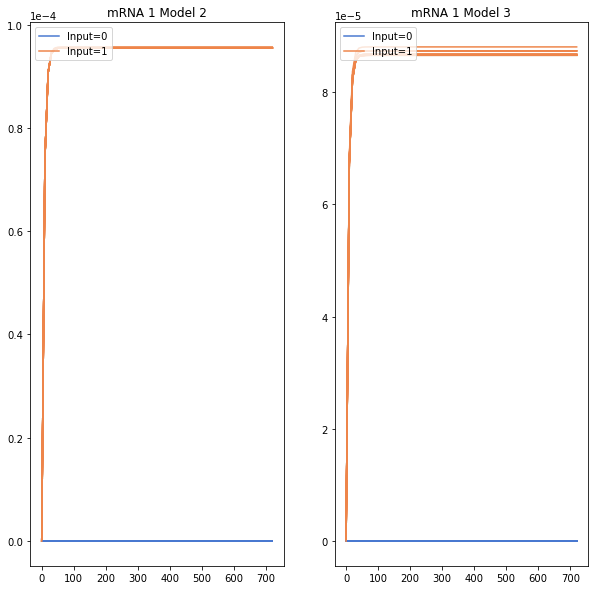

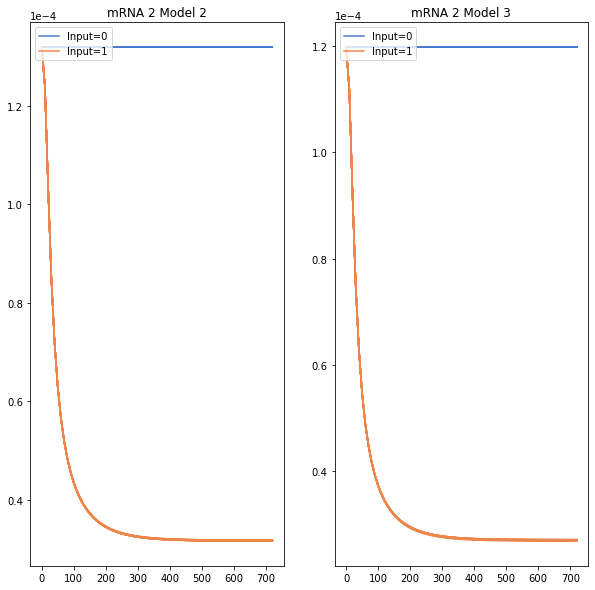

In [13]:
#Plot results
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.subplot.hspace'] = 0.99

plot_index  = {1: ['Fluor/OD'],
               2: ['Fluor/OD', 'm1', 'm2'],
               3: ['Fluor/OD', 'm1', 'm2',]
               }
titles      = {1: {'Fluor/OD': 'Pep Model 1'},
               2: {'Fluor/OD': 'Pep Model 2', 'm1': 'mRNA 1 Model 2', 'm2': 'mRNA 2 Model 2'},
               3: {'Fluor/OD': 'Pep Model 3', 'm1': 'mRNA 1 Model 3', 'm2': 'mRNA 2 Model 3'}
               }
labels      = {1: {1: 'Input=0', 2: 'Input=1'},
               2: {1: 'Input=0', 2: 'Input=1'},
               3: {1: 'Input=0', 2: 'Input=1'}
               }
legend_args = {'loc': 'upper left'}

figs, AX  = cf.plot(posterior   = accepted.iloc[-40::2], 
                    models      = sampler_args['models'],  
                    data        = data_mu,
                    data_sd     = data_sd,
                    plot_index  = plot_index,
                    labels      = labels,
                    titles      = titles,
                    legend_args = legend_args,
                    figs        = None,
                    AX          = None
                    )


## A Posteriori Identifiability Analysis
We can check the trace plots to determine if the parameters have been identified.

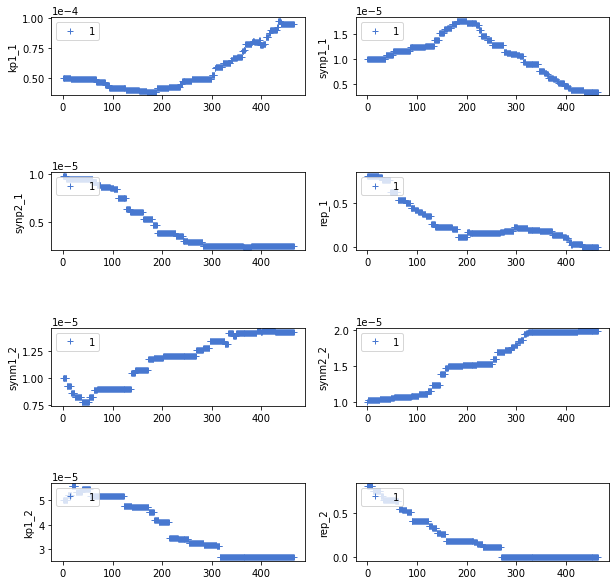

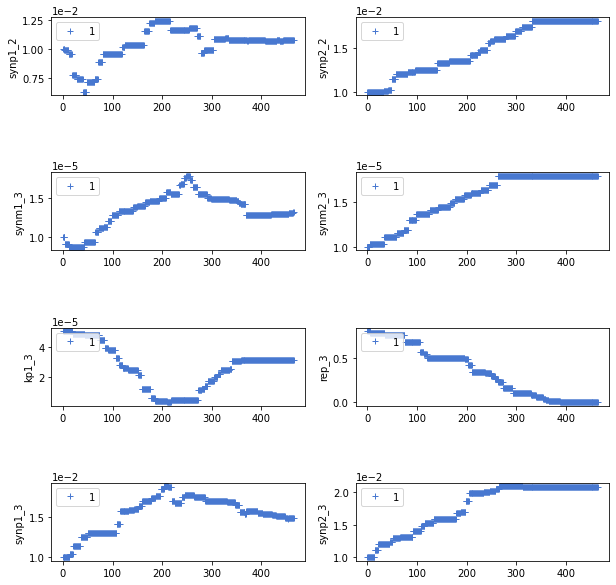

In [14]:
trace_params = [p for p in accepted.columns if p not in sampler_args['fixed_parameters']]
n_figs       = round(len(trace_params)/8 + 0.5)
trace_figs   = [plt.figure() for i in range(n_figs)]
trace_AX_    = [trace_figs[i].add_subplot(4, 2, ii+1) for i in range(len(trace_figs)) for ii in range(8)]
trace_AX     = dict(zip(trace_params, trace_AX_))

trace_figs, trace_AX = ta.plot_steps(traces, 
                                     skip        = sampler_args['fixed_parameters'], 
                                     legend_args = legend_args,
                                     figs        = trace_figs,
                                     AX          = trace_AX
                                     )

### Model Selection



In [15]:
table = ac.calculate_ic(data   = sampler_args['data'], 
                        models = sampler_args['models'], 
                        priors = sampler_args['priors'],
                        params = accepted.iloc[-10:]
                        )


Finally we rank the table to see which model performed best.

In [16]:
ranked_table  = ac.rank_ic(table, inplace=False)
print(ranked_table.head())

    row  model_num    ic value             Evidence  d(ic value)
10  459          2  560.227534  Substantial support     0.000000
1   456          2  560.228143  Substantial support     0.000609
4   457          2  560.228143  Substantial support     0.000609
7   458          2  560.228143  Substantial support     0.000609
13  460          2  560.230566  Substantial support     0.003031
